Example program for plotting the response of a forced oscillator
A triangle forcing function is assumed, with amplitude  1
The period is T= 6.283185307179586
10  harmonics are included in the truncated Fourier series
The oscillator natural frequency is  4.71238898038469  radians per second
The damping constant beta= 0.2945243112740431  per second


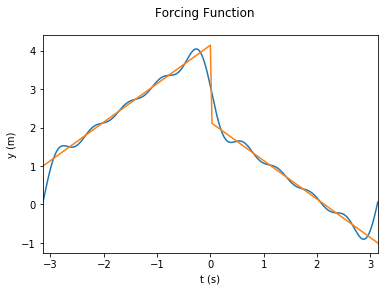

The Cosine Fourier amplitudes of the response are 
[0.0600166  0.         0.01061751 0.         0.01254656 0.
 0.00095853 0.         0.00026628 0.        ]


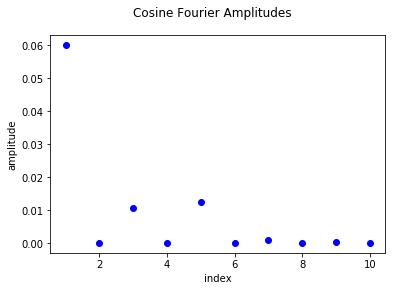

The Sine Fourier amplitudes of the response are 
[-0.0600166   0.         -0.03185253  0.         -0.0627328   0.
 -0.00670968  0.         -0.00239652  0.        ]


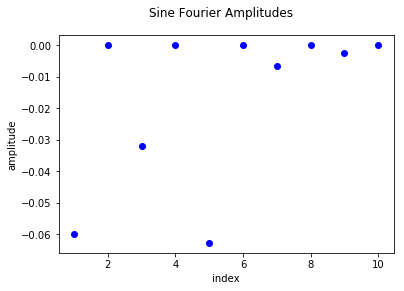

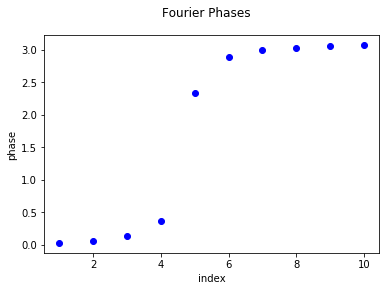

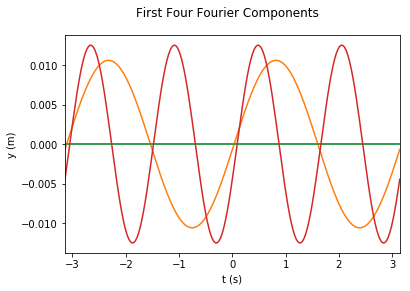

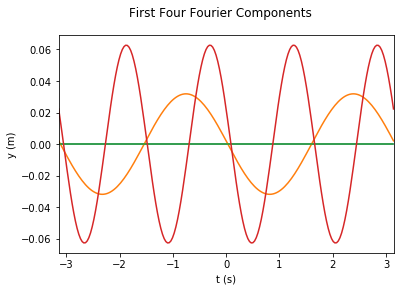

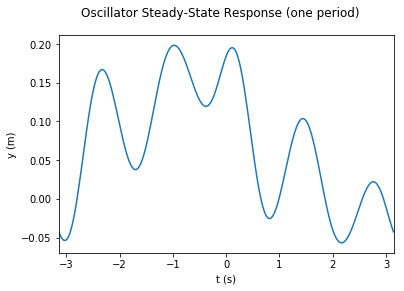

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# This is an example of using Python calculate and plot the response of a damped
# oscillator driven by various forcing functions. The forcing function is expressed
# as its Fourier series (truncated), the response for each Fourier component is calculated,
# and all of the responses are added together to given the total response.

# To execute this I use Python Version 3.6.0, installed with Anaconda 4.3.0 (64-bit)
# Let me know if you have problems with other versions, but for sure some minor
# changes (e.g. print commands) would have to be made to use Python versions <3

# Parameters for the forcing or driving function
T = 2*math.pi      # period of the driving function
N = 10             # maximum harmonic to include in the Fourier series
f0 = 1            # amplitude of the forcing function (force divided by mass)
print("Example program for plotting the response of a forced oscillator")
#print("A triangle+step forcing function is assumed, with amplitude ",f0)
print("A triangle forcing function is assumed, with amplitude ",f0)
print("The period is T=",T)
print(N," harmonics are included in the truncated Fourier series")

# Function returning the exact forcing function
def Fa(t):   # example triangle
    if t < 0: return f0*(math.pi+t+1)
    else: return f0*(math.pi-t-1)
    
# Function returning the Fourier amplitudes for the forcing function
def a(n): 
    if n == 0: 
        return f0*math.pi/2
    else: 
        return (2*f0/math.pi/n/n)*(1-(-1)**n) #math.cos(n*math.pi) # Example triangle
    
def b(n):
    if n==0:
        return (0)
    else: 
        return (2*f0/math.pi/n)*((-1)**n - 1)

# Specify the damped oscillator parameters:
omega0 = 1.5*math.pi   # natural frequency
beta = omega0/16.     # damping parameter
print("The oscillator natural frequency is ",omega0," radians per second")
print("The damping constant beta=",beta," per second")

def omega(n):
    return 2.0*n*math.pi/T   # angular frequency of the nth harmonic
    
def A(n): # Amplitude of the response of the nth harmonic
    return a(n)/math.sqrt(math.pow((omega0**2-math.pow(omega(n),2)),2)+4.0*math.pow(omega(n),2)*beta**2)

def B(n): # Amplitude of the response of the nth harmonic
    return b(n)/math.sqrt(math.pow((omega0**2-math.pow(omega(n),2)),2)+4.0*math.pow(omega(n),2)*beta**2)
    
def delta(n): # phase of the response of the nth harmonic
    return math.atan2(2.0*omega(n)*beta, omega0*omega0-math.pow(omega(n),2))
	# Note: the Python atan2 function requires the argument order (y,x), opposite from MathCad
    
def F(t):  # The forcing function, represented as a truncated Fourier series
    r = a(0)
    for n in range(1,N+1):
        r = r + a(n)*math.cos(omega(n)*t)+b(n)*math.sin(omega(n)*t)
    return r
    
def x(t):  # The response, represented as a truncated Fourier series
    r = 0.
    for n in range(0,N+1):
        r = r + A(n)*math.cos(omega(n)*t - delta(n)) + B(n)*math.sin(omega(n)*t - delta(n))
    return r

# Choose a set of time values at which to evaluate the solution y(t)
nStep = 200
step = 2.0*math.pi/nStep
t = np.arange(-math.pi,math.pi+step, step)

Fs = np.zeros(nStep+1)
Fexact = np.zeros(nStep+1)
xs = np.zeros(nStep+1)
for i in range(nStep+1):
    Fs[i] = F(t[i]);       # The forcing function as a truncated series
    Fexact[i] = Fa(t[i])   # Analytic function
    xs[i] = x(t[i]);       # The response of the oscillator

# Use pyplot from matplotlib to plot F(t)
fig, af = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('Forcing Function')
af.set_xlabel('t (s)')
af.set_ylabel('y (m)')
af.plot(t,Fs)
af.plot(t,Fexact)
plt.show()

# Plot the Fourier amplitudes
#cosine
inds = range(1,N+1)
Ds = np.zeros(N)
Phases = np.zeros(N)
for n in inds:
    Ds[n-1] = A(n)
    Phases[n-1] = delta(n)
print("The Cosine Fourier amplitudes of the response are ")
print(Ds)

fig, aD = plt.subplots()
plt.suptitle('Cosine Fourier Amplitudes')
aD.set_xlabel('index')
aD.set_ylabel('amplitude')
aD.plot(inds,Ds,'bo')
plt.show()

#sine
inds = range(1,N+1)
DsB = np.zeros(N)
Phases = np.zeros(N)
for n in inds:
    DsB[n-1] = B(n)
    Phases[n-1] = delta(n)
print("The Sine Fourier amplitudes of the response are ")
print(DsB)

fig, zD = plt.subplots()
plt.suptitle('Sine Fourier Amplitudes')
zD.set_xlabel('index')
zD.set_ylabel('amplitude')
zD.plot(inds,DsB,'bo')
plt.show()



# Plot the Fourier phases
fig, dD = plt.subplots()
plt.suptitle('Fourier Phases')
dD.set_xlabel('index')
dD.set_ylabel('phase')
dD.plot(inds,Phases,'bo')
plt.show()

# Plot some individual Fourier components
# The numpy module is used for array handling
m1 = np.zeros(nStep+1)
m2 = np.zeros(nStep+1)
m3 = np.zeros(nStep+1)
m4 = np.zeros(nStep+1)
for i in range(nStep+1):
    m1[i] = Ds[1]*math.sin(omega(1)*t[i] - delta(1))
    m2[i] = Ds[2]*math.sin(omega(2)*t[i] - delta(2))
    m3[i] = Ds[3]*math.sin(omega(3)*t[i] - delta(3))
    m4[i] = Ds[4]*math.sin(omega(4)*t[i] - delta(4))
fig, am = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('First Four Fourier Components')
am.set_xlabel('t (s)')
am.set_ylabel('y (m)')
am.plot(t,m1)
am.plot(t,m2)
am.plot(t,m3)
am.plot(t,m4)
plt.show()


# Plot the full response
fig, ax = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('Oscillator Steady-State Response (one period)')
ax.set_xlabel('t (s)')
ax.set_ylabel('y (m)')
ax.plot(t,xs)
plt.show()